<a href="https://colab.research.google.com/github/gerega37/mipt_study/blob/main/MathHW_Tsvetkova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [113]:
# Open the data
url = 'https://raw.githubusercontent.com/gerega37/mipt_study/main/unconv.csv'
data = pd.read_csv(url)
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


In [114]:
data.isnull().sum()

Well       0
Por        0
Perm       0
AI         0
Brittle    0
TOC        0
VR         0
Prod       0
dtype: int64

There are no any null values

In [115]:
# Continuous variables
var_real = ['Well','Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']

# Target variable
target = 'Prod'

## Задание 2.1

In [116]:
# Build a correlation matrix of factors by including the target attribute in it
data[var_real+[target]].corr()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


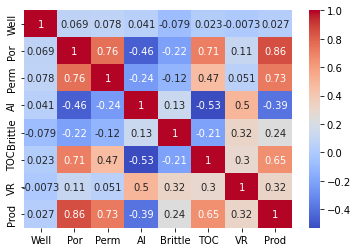

In [117]:
sns.heatmap(data[var_real+[target]].corr(), cmap='coolwarm', annot = True);

The highest correlation is observed between the target variable and Por, Perm, TOC.

In [118]:
data.shape

(200, 8)

In [119]:
matrix = data.corr()

In [120]:
# Calculate the rank of the resulting correlation matrix
print('Rank:', np.linalg.matrix_rank(matrix))

Rank: 8


In [121]:
# Calculate the determinant of the correlation matrix
print('Determinant: {:.4f}'.format(np.linalg.det(matrix)))

Determinant: 0.0007


The correlation matrix is poorly conditioned, the determinant is close to 0.

## Задание 2.2

In [122]:
# Create a matrix of observations
# Denote a matrix of observations as X, and the vector of correct answers as y .
y = data['Prod']
X = data.drop('Prod', axis=1).astype(float)

In [123]:
# Build a linear regression model using the least squares method.
# To do this, use the NumPy matrix formula.
# As an answer, specify the obtained estimates of the coefficients of the model
n = X.shape[0]
X1 = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X1.T@X1)@X1.T@np.array(y)

In [124]:
# Vector of coefficient estimates
w_hat

array([-1.23230803e+03,  5.07003631e-02,  2.30179140e+02,  1.16239006e+02,
       -3.65202301e+02,  2.49943700e+01, -7.84009294e+01,  7.85259815e+02])

In [125]:
y_pred = X1 @ w_hat

In [126]:
y_pred

array([4622.70495134, 3412.28509773, 4717.27342158, 5045.93273845,
       3817.59960464, 4266.59975955, 4203.98238154, 3385.02513907,
       4202.93287979, 4567.34247328, 4762.32689161, 4958.74652566,
       5376.37329106, 5398.87579314, 4575.43049238, 3536.30419396,
       5434.55260889, 3963.46242028, 4803.20009394, 3784.53263333,
       5604.88269189, 4542.14215288, 2558.04389628, 2343.05617327,
       5718.14877932, 2116.77843825, 4861.44126248, 4169.61525382,
       2732.36602593, 3721.44003237, 5653.63615064, 3725.47692036,
       3923.29152933, 4038.39782584, 3711.64976655, 2758.56904237,
       3495.22598653, 5428.21355924, 4155.15316364, 4674.10333006,
       4261.05823196, 4363.90516919, 3096.2697799 , 2680.51174195,
       5533.21279385, 3298.1714543 , 2901.72364441, 2405.622932  ,
       5222.60246438, 5077.32285034, 5341.73544002, 5941.43289724,
       4539.79436263, 3858.26792027, 5432.62982118, 3991.74414981,
       3252.50355726, 3781.69338147, 3662.13468383, 4112.86018

## Задание 2.3

In [127]:
# Build a forecast of gas production for the well with the parameters specified below
# What is the absolute error of your forecast for the proposed well ?
# The answer is given in millions of cubic feet per day).
well_data = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
well_predict = well_data @ w_hat

In [128]:
well_predict = well_data @ w_hat
well_predict

4723.064053707485

In [129]:
4748.315042 - 4723.064053707485

25.250988292515103

Метрика MAPE:

![](https://miro.medium.com/max/596/1*vmIM1jePXsDxPpgWEQ35Lg.png)

In [130]:
# Build a forecast of gas production for all wells from the training data set.
# What is the value of the MAPE metric of your model?
from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE for a 1st degree polynomial {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred)*100))

MAPE for a 1st degree polynomial 3.63%


## Задание 2.5

According to the constructed model, the relationship between the percentage of organic carbon and the productivity of the well is reversed. However, according to the positive correlation coefficient between these factors and the target attribute equal to 0.65 (as well as according to real facts from the field of gas production), the relationship should be direct. To make sure of this, you can build a scattering diagram reflecting the relationship between TOC and Prod:

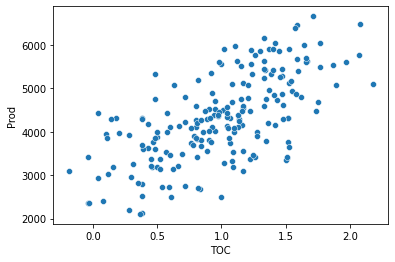

In [131]:
sns.scatterplot(x='TOC', y='Prod', data=data);

This result explains the presence of strong multicollinearity in the data, which "spoils" the coefficients.
Let's exclude strongly correlating factors from the data. By strong correlation in this problem, we will mean values above 0.7.
We will also exclude from the data factors for which the correlation with the target variable is less than 0.05.
Thus, we will delete the columns 'Well', 'Perm', 'TOC'.

In [132]:
# Exclude strongly correlated factors from the data.
data_new = data.drop(columns=['Well', 'Perm', 'TOC'])

In [133]:
# Build a linear regression on the data updated after removing the factors using the least squares method.
X2 = data_new.drop('Prod', axis=1).astype(float)
y2 = data_new['Prod']

In [134]:
n = X2.shape[0]
X3 = np.column_stack((np.ones(n), X2))
w_hat2 = np.linalg.inv(X3.T@X3)@X3.T@np.array(y2)

In [135]:
w_hat2

array([-1835.44646069,   293.03624565,  -200.03091206,    27.64098209,
         517.40272597])

In [136]:
y_pred2 = X3 @ w_hat2

In [137]:
# Make a forecast for the entire training dataset and calculate the MAPE metric.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1, include_bias=False)
X2_poly = poly.fit_transform(X2)
display(pd.DataFrame(X2_poly))

,0,1,2,3
0,12.08,2.80,81.40,2.31
1,12.38,3.22,46.17,1.88
2,14.02,4.01,72.80,2.72
3,17.67,2.63,39.81,1.88
4,17.52,3.18,10.94,1.90
...,...,...,...,...
195,11.95,2.97,67.18,2.06
196,17.99,3.38,44.32,2.08
197,12.12,3.52,57.07,1.73
198,15.55,2.48,58.25,2.35


In [138]:
y_pred = X1 @ w_hat

In [139]:
from sklearn.metrics import mean_absolute_percentage_error
 
print('MAPE for a 1st degree polynomial {:.2f}%'.format(mean_absolute_percentage_error(y, y_pred2)*100))

MAPE for a 1st degree polynomial 4.04%


## Задание 3.1

In [140]:
# Generate third-order polynomial features on the factors that you have chosen to train the models
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X3_poly = poly.fit_transform(X2)
display(pd.DataFrame(X3_poly))

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,12.08,2.80,81.40,2.31,145.9264,33.8240,983.3120,27.9048,7.8400,227.9200,...,21.952000,638.176000,18.110400,18552.688000,526.495200,14.941080,539353.144000,15305.967600,434.358540,12.326391
1,12.38,3.22,46.17,1.88,153.2644,39.8636,571.5846,23.2744,10.3684,148.6674,...,33.386248,478.709028,19.492592,6863.973858,279.494712,11.380768,98419.153113,4007.537532,163.183248,6.644672
2,14.02,4.01,72.80,2.72,196.5604,56.2202,1020.6560,38.1344,16.0801,291.9280,...,64.481201,1170.631280,43.737872,21252.358400,794.044160,29.667584,385828.352000,14415.564800,538.603520,20.123648
3,17.67,2.63,39.81,1.88,312.2289,46.4721,703.4427,33.2196,6.9169,104.7003,...,18.191447,275.361789,13.003772,4168.118943,196.836564,9.295472,63092.325141,2979.491868,140.704464,6.644672
4,17.52,3.18,10.94,1.90,306.9504,55.7136,191.6688,33.2880,10.1124,34.7892,...,32.157432,110.629656,19.213560,380.593848,66.099480,11.479800,1309.338584,227.398840,39.493400,6.859000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11.95,2.97,67.18,2.06,142.8025,35.4915,802.8010,24.6170,8.8209,199.5246,...,26.198073,592.588062,18.171054,13404.062628,411.020676,12.603492,303193.578232,9297.093944,285.085048,8.741816
196,17.99,3.38,44.32,2.08,323.6401,60.8062,797.3168,37.4192,11.4244,149.8016,...,38.614472,506.329408,23.762752,6639.206912,311.587328,14.623232,87056.109568,4085.665792,191.746048,8.998912
197,12.12,3.52,57.07,1.73,146.8944,42.6624,691.6884,20.9676,12.3904,200.8864,...,43.614208,707.120128,21.435392,11464.586848,347.533472,10.535008,185876.128243,5634.583877,170.804803,5.177717
198,15.55,2.48,58.25,2.35,241.8025,38.5640,905.7875,36.5425,6.1504,144.4600,...,15.252992,358.260800,14.453440,8414.795000,339.481000,13.695800,197645.890625,7973.696875,321.685625,12.977875


In [141]:
X3_poly.shape

(200, 34)

In [143]:
from sklearn.model_selection import cross_validate

In [144]:
from sklearn.linear_model import LinearRegression

In [145]:
# Train a linear regression model from the sklearn library (Linear Regression) on the obtained polynomial factors.
# We highlight the factors that interest us

X2 = data_new.drop('Prod', axis=1).astype(float)
y2 = data_new['Prod']

# adding polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X2)
 
# creating a linear regression model
lr = LinearRegression()
 
# Estimate the average value of the MAPE metric
cv_results = cross_validate(lr, X2, y2, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE on training folds: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE on validation folds: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE on training folds: 1.77 %
MAPE on validation folds: 2.68 %


## Задание 3.2

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
from sklearn.linear_model import Lasso

In [148]:
# Train the Lasso model from the sklearn library on the obtained polynomial factors
# Standardize the factors using Standard Scaler.
# Set the regularization coefficient to 5.
# We highlight the factors that interest us

X2 = data_new.drop('Prod', axis=1).astype(float)
y2 = data_new['Prod']

# initialize the StandardScaler standardizer
scaler = StandardScaler()
# customize the parameters of the standardizer
X2 = scaler.fit_transform(X2)

# adding polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X2)

# creating a linear regression model with L1-regularization
lasso = Lasso(alpha=5, max_iter=10000)

In [149]:
# Estimate the average value of the MAPE metric using cross-validation on five folds.
cv_results = cross_validate(lasso, X2, y2, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE on training folds: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE on validation folds: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE on training folds: 1.83 %
MAPE on validation folds: 2.28 %


## Задание 3.3

In [150]:
from sklearn.linear_model import Ridge

In [151]:
# Train the Ridge model from the sklearn library on the obtained polynomial factors
# Standardize the factors using Standard Scaler.
# Set the regularization coefficient to 1.

X2 = data_new.drop('Prod', axis=1).astype(float)
y2 = data_new['Prod']

scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

# adding polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X2)

# creating a linear regression model with L2 regularization
ridge = Ridge(alpha=1, solver='svd')

# Estimate the average value of the MAPE metric using cross-validation on five folds.
cv_results = cross_validate(ridge, X2, y2, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE on training folds: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE on validation folds: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

MAPE on training folds: 1.83 %
MAPE on validation folds: 2.72 %
